# An introduction to the least sqaures method

## Scope

In this note we will cover the basic of how to use linear algebra and the least squares method to find the optimal parameters of a model. The method is commonly used in all scientific analysis where we want to fit a set of measured data to a model. Note that this is not ment as a course in linear algebra, and alot of the math and expression used here might not refer to the exact mathematical definition, for a rigid derivation of the least squares method we reffer you to a dedicated linear algebra textbook. 




## Forward and inverse models in remote sensing

In remote sensing the measurements we get of a geophysical variable are often indirect. We measure radiation at some distance and want to find a method to excract some variable e.g. Temperature from this measurement. To do this we often start by figuring out how the radiation we measure relates to the variable, *x*, we want to deterime. This is called the *forward model*, $f(x)$. Denoting the radiation we measure $y$, we can write the relationship as an equation 

\begin{equation}
    y=f(x)
\end{equation}

The model itself can be derived from physical principles or be a statistical model based on empirical measurements, the exact formulation is not important for the concept itself. 

Now that we have determined a relationship between the variable we want to find and the radiation we measure, we now need to find the inverse of this model, $f^{-1}(x)$ which we can then use to to *retrieve* the value $x$ based on a measurement $y$

\begin{equation}
    x=f^{-1}(y)
\end{equation}

In the computer lab connected to this note you will derive such an inverse model for sea-ice retrieval from a microwave radiometer. However, we are going to do this using the framework of linear algebra, so this note is made to give you a short review on how to do regression using linear algebra. This note is not a deep dive into linear algebra, and it is expected that you are allready somewhat familiar with concepts like *matrices* and *vectors* and how to solve equations using these tools. If you feel like you need a recap of this, its reccomended to look up in your favourite linear algebra textbook or online video and do a few excercises yourself.


# Solving equations using linear algebra

We are now going to have a short look at how to use matrices to solve equations. First I want you to try and solve the equation below:
\begin{align}
16 &= 3x_1 + 2x_2 \\
6  & = x_1 + x_2
\end{align}
type in the answer in the function called "problem_1" below to see if you got it correct. 

## Problem 1

In [1]:
from solutions import problem_1

#type in your answer here to check if you are correct
x_1 = 
x_2 = 
problem_1(x_1,x_2)

Sorry wrong, try again


## Using matrices

This equation was quite a short and simple one, and perhaps you solved it by substitution or some clever algebra. In reality we often end up sovling a set of equations with many more unknowns and in this case we need some way to systemize how to solve large equations. For this we use matrices. Imagine we want to solve the set of equations
\begin{align}
9 &= x_1 + x_2 + x_3 \\
x_4 &= x_2+x_3 - 3 \\
18 & = 2x_4+x_5 \\
0 & = x_2+x_3-x_4 \\
9 & = 2x_1 + x_2+x_5 \\
\end{align}
to find $x_1,...,x_5$, how do we do it?

First step is to go from a set of equations to a problem of $vectors$ and $matrices$, such that the problem can be expressed as:

\begin{equation}
\vec{y} = \textbf{K} \vec{x},
\end{equation}

where $\vec{y}$ and $\vec{x}$, are *columnvectors* and $\textbf{K}$ is a *matrix*. Considering the algebra of matrix and vector multiplication (https://en.wikipedia.org/wiki/Matrix_multiplication) we can write the equations above as:
\begin{equation}
\begin{pmatrix}
    9 \\
    3 \\
    18 \\
    0 \\
    9
\end{pmatrix} = \begin{pmatrix}
    1 & 1 & 1 & 0 & 0 \\
    0 & 2 & 1 & -1 & 0 \\
    0 & 0 & 0 & 2 & 1 \\
    0 & 1 & 1 & -1 & 0 \\
    2 & 1 & 0 & 0 & 1
\end{pmatrix}\begin{pmatrix}
    x_1 \\
    x_2 \\
    x_3 \\
    x_4 \\
    x_5
\end{pmatrix}
\end{equation}
As an excercise you can check the first (or any other) row manually if you want to get a better feeling for how the conversion from set of equations to matrix formulation is done. 

The solution can then found by finding the *inverse* of the matrix and multiplying it from the left **(remember that matrix multiplication is not commutative)** at both sides of the equation. 

\begin{align}
\vec{y} & = \textbf{K} \vec{x} \\
\textbf{K}^{-1}\vec{y} & = \textbf{K}^{-1}\textbf{K} \vec{x}, \\
\textbf{K}^{-1}\vec{y} & = \vec{x}.
\end{align}

There are many ways to calculate the inverse manually, but we will use the computer to help us. Below is a piece of code which solved the equation above using a python library called numpy. 


In [2]:
import numpy as np #import python library for numerics

y = np.array([9,3,18,0,9])

K = np.array([[1,1,1,0,0],[0,2,1,-1,0],[0,0,0,2,1],[1,1,1,-1,0],[2,1,0,0,1]]
)

Kinv = np.linalg.inv(K)

x = np.dot(Kinv,y)
print(x)

[2. 5. 2. 9. 0.]


we thus find 

\begin{equation}
\vec{x} = \begin{pmatrix}
    x_1 \\
    x_2 \\
    x_3 \\
    x_4 \\
    x_5
\end{pmatrix} = \begin{pmatrix}
    3 \\
    5 \\
    2 \\
    9 \\
    0
\end{pmatrix}
\end{equation}

## Problem 2

Solve the following se of equations using matrix algebra

\begin{align}
9 &= x_1 + x_2 + x_3 \\
0 &= x_2+x_3 - 3 \\
18 - x_2 & = 2x_1 \\
\end{align}

insert the solution in the function below to see if you have the correct answer:

In [3]:
from solutions import problem_2

#type your code here

#type in your answer here to check if you are correct
x_1 = 
x_2 = 
x_3 = 
problem_2(x_1,x_2,x_3)

SyntaxError: invalid syntax (4076812488.py, line 4)

## Over-determined systems

A matrix which has an inverse is called *invertible*. One requirement is that it needs to be square (nxn), and that non of the rows are linearly dependend, if one or more of the rows are linearly dependent the matrix is said to be *singular*. There are many ways of checking whether a matrix is invertible, and somtimes you can even convert a non-square matrix to a square one to make it invertible, for details around this check your linear-algebra book. 

We can say that a system of equation is *under-determined* if there are less linearly independent equations that there are variables to solve for, and *over-determined* if there are more equations than variables. 

The latter is often the case in real life if we do measurement of a variable $x$, and we perform several measurements of the variable $y$. Since we have noise in the data, each measurement $y_i$ is often a bit different and we need a method to determine the best fit $\hat{x}$ based on our measurements. 

In the simplest form the relationship between the variable $x$ and the measurement $y$ is unity (i.e. 1), and we can find the most probable value for $x$ as the mean of all the measurements.
\begin{equation}
\hat{x} = \frac{1}{N} \sum_n y_n
\end{equation}

In remote rensing this is called *retrieving* $x$ from a set of measurement $y$. In terms of the forward and inverse model we discussed before, the forward model for the problem is simply
\begin{equation}
y_i = f(x) = 1 \cdot x, 
\end{equation}
where $y_i$ is measurement number $i$, and the inverse $f^{-1}(x)$ is just given by the sum to get the mean. 

If we for example have a set of five measurements [9,10,8,9,8] we can take the mean using the code below:

In [5]:
import numpy as np #import python library for numerics

y = np.array([9,10,8,9,8])
x_hat = np.mean(y)
print('The mean is: ' + str(x_hat))

The mean is: 8.8


However in remote sensing the are often much more complicated with several unknown variables interacting to produce the final value. Thus rather than simply taking the mean as we did above, its nice to once again use linear algebra to formulate our problem. $\vec{y}$ is now a vector holding all our measurements (called *measurement vector*), $\vec{x}$ (called the *state vector*) is the true value of the variable(s) we want to retrieve and $\textbf{K}$ the forward model expressed as a matrix (also called the *linearized-forward model*, *jacobian* or *weighting function matrix*). 

\begin{equation}
\vec{y} = \textbf{K} \vec{x},
\end{equation}

The expression become the following: 

\begin{equation}
\vec{x} = \begin{pmatrix}
    y_1 \\
    y_2 \\
    y_3 \\
    y_4 \\
    y_5
\end{pmatrix} = \begin{pmatrix}
    1 \\
    1 \\
    1 \\
    1 \\
    1
\end{pmatrix}\begin{pmatrix}
    x
\end{pmatrix}
\end{equation}

## Problem 3 

What would $\textbf{K}$ be if the forward model was $y = 3x$ instead? Enter the answer in the code below to check your understanding. 

In [6]:
import numpy as np #import python library for numerics
from solutions import problem_3

K = np.array([[],[],[],[],[]]) #write in answer here
problem_3(K)

Sorry wrong, try again


## Least-squares method

So now we have formulated the forward model in the language of linear algebra, but we somehow need to find x? Since we have more equations than variables, and the equations are not consistent with each other the system is over-determined and we need to find some way to estimate the best fit $x$ rather than the exact solution. One common method is to use something called a pseudo-inverse (remember inverses can only be taken from square matrices which is not the case here). This pseudo-inverse, often written $\textbf{K}^\dagger$ can be found by recognizing that we can isolate $x$ through some matrix algebra manipulation of the linearized forward model equation. 

\begin{align*}
\vec{y} & = \textbf{K} \vec{x} \\
\textbf{K}^T\vec{y} & = \textbf{K}^T\textbf{K} \vec{x} \\
(\textbf{K}^T\textbf{K})^{-1}\textbf{K}^T\vec{y} & = (\textbf{K}^T\textbf{K})^{-1}\textbf{K}^T\textbf{K} \vec{x} \\
(\textbf{K}^T\textbf{K})^{-1}\textbf{K}^T\vec{y} & = \vec{x}, \\
\hat{\vec{x}}& = \textbf{K}^\dagger\vec{y},
\end{align*}

Here we use the fact that $(\textbf{K}^T\textbf{K})$ is a square matrix and has an inverse and that $(\textbf{K}^T\textbf{K})^{-1}(\textbf{K}^T\textbf{K}) = \textbf{I}$, where $\textbf{I}$ is the identity matrix. In the final line we also add a ^ to the $\vec{x}$ to stress that its not the exact to the equations we have found (in fact there exists no exact solution), but a best estimate of $\vec{x}$. This method of generating the pseudoinverse is called *least-squares method*, and is often used in statistical analysis. 

Note that algebra above can be motivated by looking at what value of $\vec{x}$ minimizes the *residual* $|\vec{y}-\textbf{K}\vec{x}|$, however for details on the derivation check out a book on linear algebra or https://en.wikipedia.org/wiki/Ordinary_least_squares.

If we apply the method on the the example we had above, we can calculate $\hat{\vec{x}}$ using the code below:


In [13]:
y = np.array([9,10,8,9,8])
K = np.array([[1],[1],[1],[1],[1]])
KtK = np.dot(K.T,K)
KtK_inv = np.linalg.inv(KtK)
Kinv = np.dot(KtK_inv,K.T)
x_hat = np.dot(Kinv,y)
print('The least squares solution is: ' + str(x_hat))

The least squares solution is: [8.8]


## Problem 4

Using the fact that the inverse of a scalar $a$ is just $\frac{1}{a}$, show that the pseudo inverse becomes the mean of the measurement vector for the trivial case where the forward model is $y=x$.

## A more realistic case

For the trivial examples above, the algerbra might seem a bit overkill. But now we will look at a more realistic case closer to the problems we face in remote sensing. 

### Determining the temperature lapse rate

Let us assume that the temperature in the atmosphere has a constant lapse rate, i.e. that it decreases in a linear fashion with altitude. A linear lapse rate can be defined by two variables $x_1$ and $x_2$ such that the temperature, $T$, at an altitude (in km), $z$, is given as
\begin{equation}
T(z) = x_1 z + x_2.
\end{equation}

Our instrument can measure the temperature at 8 different altitudes (0.1,1,2,4,6,12,5.5) km and the inverse problem becomes to *determine the lapse rate based on a set of temperature measurements*. In the code below we run a simulation which can generate the temperatures at these altitudes. 

In this case our measurement vector $\vec{y}$ becomes the temperature at each altitude, and the state vector $\vec{x} = [x_1,x_2]^T$. Our forward model for each measurement $i$ is:
\begin{equation}
y_i = x_1 z + x_2 = [z_i,1][x_1,x_2]^T
\end{equation}
Tabulating this out for the measured altitudes, the matrix problem becomes:

\begin{equation}
\begin{pmatrix}
    y_1 \\
    y_2 \\
    y_3 \\
    y_4 \\
    y_5 \\
    y_6 \\
    y_7
\end{pmatrix} = \begin{pmatrix}
    0.1 & 1 \\
    1 & 1 \\
    2 & 1 \\
    4 & 1 \\
    6 & 1 \\
    12 & 1 \\
    5.5 & 1     
\end{pmatrix}\begin{pmatrix}
    x_1 \\
    x_2 
\end{pmatrix}
\end{equation}


To generate the measured data we use a piece of simulation code below (the temperature function from the solution module)

In [3]:
from solutions import temperature
import numpy as np

z = np.array([[0.1],[1],[2],[4],[6],[12],[5.5]]) #altitude in km
y = temperature(z)
print(y)

[[ 22.28389331]
 [ 16.30573662]
 [  8.89100275]
 [ -3.09403524]
 [-17.36678825]
 [-54.28783871]
 [-13.04465161]]


We now want to find the lapse rate. To do this we use the pseudoinverse

In [16]:
K = np.array([[0.1,1],[1,1],[2,1],[4,1],[6,1],[12,1],[5.5,1]])
KtK = np.dot(K.T,K)
Kinv = np.dot(np.linalg.inv(KtK),K.T)
x_hat = np.dot(Kinv,y)
print("The estimated lapse rate is " + str(x_hat[0]))
print("The estimated surface temperature is " + str(x_hat[1]))

The estimated lapse rate is [-6.66801712]
The estimated surface temperature is [22.78731855]


And we can plot the measurement and the estimation to see that there is good agreement between them

Text(0.5, 1.0, 'Figure 1: Measured and fitted lapse rate')

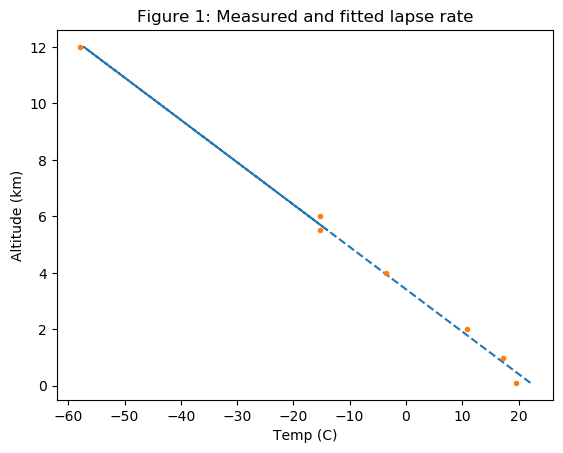

In [17]:
from matplotlib import pyplot as plt

y_estimate = z*x_hat[0]+x_hat[1] #y based on the estimated x_hat

plt.plot(y_estimate,z,'--')
plt.plot(y,z,'.')
plt.xlabel('Temp (C)')
plt.ylabel('Altitude (km)')
plt.title('Figure 1: Measured and fitted lapse rate')

Another interesting property to plot is the accuracy of the fit, or *residuals* $\vec{y} - \textbf{K}\vec{\hat{x}}$. In this case we see a variability of a few degrees indicating some noise (or natural variability) in the data. One thing to notice is that we **Ideally we want the residual to look like random gaussian noise** for a successfull retrieval. 

Text(0.5, 1.0, 'Figure 2: Residual of temperature fit')

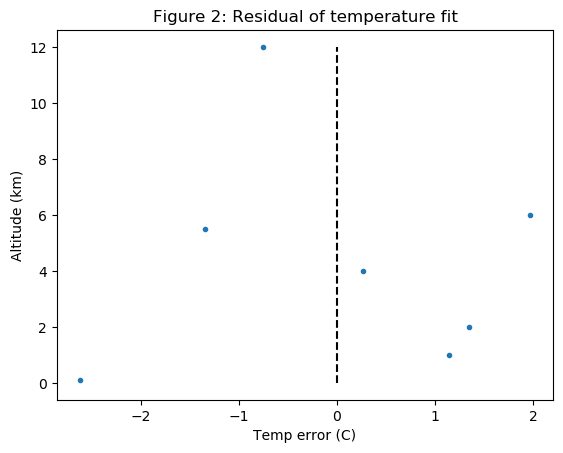

In [18]:
from matplotlib import pyplot as plt

y_estimate = z*x_hat[0]+x_hat[1] #y based on the estimated x_hat

plt.plot(y-y_estimate,z,'.')
plt.plot([0,0],[0,12],'k--')
plt.xlabel('Temp error (C)')
plt.ylabel('Altitude (km)')
plt.title('Figure 2: Residual of temperature fit')


## Problem 5

Write code below that redo the retrieval from above except for the fact that the measurements are now taken at altitudes [0,5,10,3,2,6] km and reproduce Figure 1.

In [10]:
#Write your code here
#
#
#
#


## So how do I find the jacobian?

Now in the examples above it has been possile to figure out the jacobian matrix by simple inspection, however if we want to generalize this we need a more formal way of doing it. In fact the formal definition of a jacobian matrix for a set of equations is actually given by
\begin{equation}
    \textbf{K}_{i,j} = \frac{\partial y_i}{\partial x_j}
\end{equation}

So from the temperature lapse rate example we had
\begin{equation}
   y_1 = 0.1x_1+x_2,
\end{equation}
and thus
\begin{align}
   \frac{\partial y_1}{\partial x_1} &= 0.1,\\
   \frac{\partial y_1}{\partial x_2} &= 1,
\end{align}

and we can see that this matches the corresponing entries in $\textbf{K}$.

## Problem 6

Looking at the lapserate measurements above, we no longer assume that the temperature has a linear-lapse rate but a quadratic one. Our forward model then becomes
\begin{equation}
T(z) = x_1 z^2 + x_2 z + x_3,
\end{equation}
where once again $z$ is the altitude above ground in km. 

Now its you task to find the weighting function (i.e. a row of the jacobian matrix) for an altitude of 3 km and write it into the function below.

In [11]:
import numpy as np #import python library for numerics
from solutions import problem_5

K_3 = np.array([[],[],[]]) #write in answer here
problem_5(K_3)

Sorry wrong, try again


## Final comments

Nice, if you made it through this note and solved the problems you are on a good way of understanding how we actually can get geophysical data from remote measurements! 

The examples here are a bit artificial and constructed to be able to follow the arthimatic by hand. In the lab we will look at a more realistic case when we will create a software which can detect sea-ice change from measurements from a radiometer on board a satellite! 

See you there!